<h1> Euclidean degrees

Want something a basis set with cardinality somewhere between a total order and a tensor grid? Then a Euclidean degree [1] might be just right for you! These index sets are available in Effective Quadratures, can be used with effective quadrature subsampling. Here is quick demo in 2D

In [1]:
%matplotlib inline
from effective_quadratures.indexset import IndexSet
from effective_quadratures.parameter import Parameter
from effective_quadratures.effectivequads import EffectiveSubsampling
from effective_quadratures.plotting import coeffplot2D
import numpy as np

We begin by defining a Euclidean degree index set

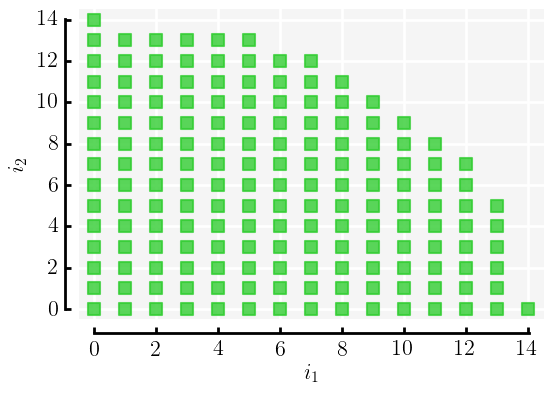

In [2]:
euclid = IndexSet('Euclidean degree', [14,14])
euclid.plot()

For comparison, note that a total order basis would give us...

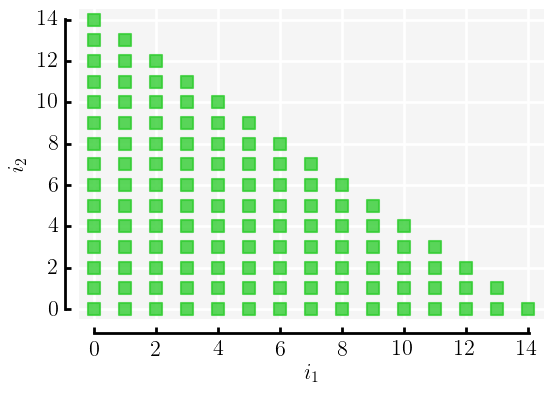

In [3]:
total = IndexSet('Total order', [14,14])
total.plot()

Ok, so now lets sketch a quick problem. Assume our complex model is given by:

In [4]:
def very_complex_model(x):
    return np.exp(x[0] + x[1])

Now set up the basics for subsampling from a tensor grid with order [14,14]. Remember that order 20 in each direction corresponds to 15 points per direction!

In [5]:
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=15)
effective = EffectiveSubsampling([x1,x1], euclid)

Now, we must determine the least number of subsamples at which to evaluate this very complex model. Recall, this will be determined by the number of basis terms. 

In [6]:
minimum_evals = effective.least_no_of_subsamples_reqd()
effective.set_no_of_evals(minimum_evals)

Now let us plot the coefficients. 

In [7]:
coefficients, cond = effective.computeCoefficients(very_complex_model)

Note that the *computeCoefficients()* function also returns the condition number of the matrix used in the least squares computation. This is useful for assessing how stable the least squares solve is

In [8]:
print cond

9.31768358007


Perfect, its relatively small. Now let us plot the coefficients...

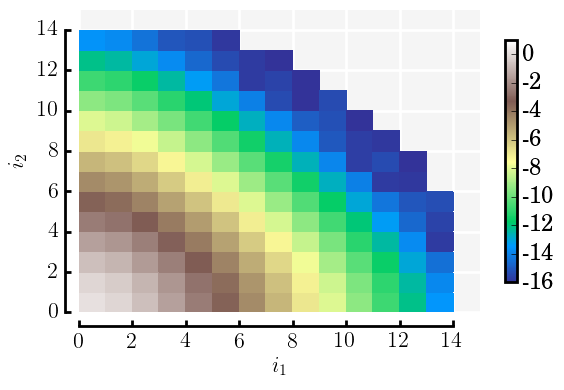

In [9]:
coeffplot2D(coefficients, euclid, r'$i_1$', r'$i_2', 'figure.png')

Now lets see how this compares if we use the full tensor grid

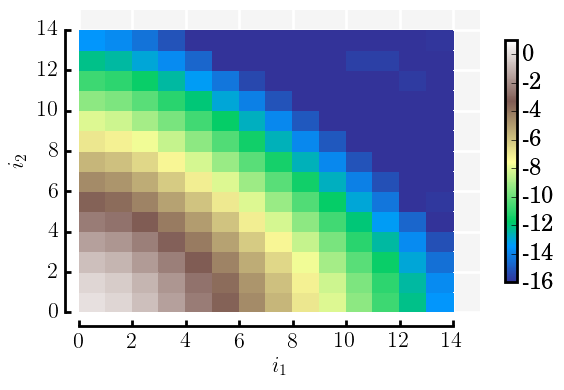

In [11]:
tensor = IndexSet('Tensor grid', [14, 14])
effective = EffectiveSubsampling([x1,x1], tensor)
minimum_evals = effective.least_no_of_subsamples_reqd()
effective.set_no_of_evals(minimum_evals)
coefficients, cond = effective.computeCoefficients(very_complex_model)
coeffplot2D(coefficients, tensor, r'$i_1$', r'$i_2')

By using the euclidean degree with effective quadrature subsampling, we can capture most of the coefficient information, relative to the full tensor grid. 

**References**

1. Trefethen, Lloyd N. "Multivariate polynomial approximation in the hypercube." arXiv preprint arXiv:1608.02216 (2016).